# **Convolutional Neural Network (CNN) - Image Classification**

---

### Directory

In [1]:
root_path = "C:/Red Files/Model/RICE DESEASE DATASET/TTV CLASSES/" # Windows/PC

train_data_dir = root_path + "Train" 
#D:/RICE DESEASE DATASET/TTV CLASSES/Train/
valid_data_dir = root_path + "Validation" 
#D:/RICE DESEASE DATASET/TTV CLASSES/Validation/
test_data_dir = root_path + "Test" 
#D:/RICE DESEASE DATASET/TTV CLASSES/Test/

### Initializations

In [2]:
img_height, img_width = (224,224) 
batch_size = 200
epochs_num = 50

### Data Augmentation

In [3]:

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet_v2 import preprocess_input


# training ImageDataGenerator
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                   width_shift_range=0.3, 
                                   fill_mode='reflect',
                                   height_shift_range=0.3,
                                   brightness_range=(0.1, 0.6),
                                   shear_range=45.0,
                                   zoom_range=[0.5, 1.5])
# Generator from Training Directory
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training') #set as training data

# validation ImageDataGenerator
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                   width_shift_range=0.3, 
                                   fill_mode='reflect',
                                   height_shift_range=0.3,
                                   brightness_range=(0.1, 0.6),
                                   shear_range=45.0,
                                   zoom_range=[0.5, 1.5],
                                   validation_split=0.99) 
# Generator from Validation Directory
valid_generator = valid_datagen.flow_from_directory(valid_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False,
                                                    subset='validation')#set as validation data

# testing ImageDataGenerator
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                   width_shift_range=0.3, 
                                   fill_mode='reflect',
                                   height_shift_range=0.3,
                                   brightness_range=(0.1, 0.6),
                                   shear_range=45.0,
                                   zoom_range=[0.5, 1.5],
                                   validation_split=0.99) 

# Generator from Testing Directory
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size, # dati 1 lang nakalagay sa batch - search na lang kung ilan ba dapat batch sa train, valid, at test (kung needba magkakaiba ng batch)
                                                    class_mode='categorical',
                                                    shuffle=False,
                                                    subset='validation') # set as testing data


Found 7180 images belonging to 9 classes.
Found 891 images belonging to 9 classes.
Found 891 images belonging to 9 classes.


Print shapes and number of classes

In [4]:
print('Number of Batches per epoch train=%d, valid=%d ,test=%d' % (len(train_generator), len(valid_generator),len(test_generator)))


Number of Batches per epoch train=36, valid=5 ,test=5


In [5]:
x,y = test_generator.next()

In [6]:
x.shape

(200, 224, 224, 3)

In [7]:
train_generator.num_classes

9

### Import Model

In [8]:

# IMPORT MODEL-----------------------------------------------------

from keras.applications.resnet_v2 import ResNet50V2
base_model = ResNet50V2(
    input_shape=[img_height, img_width] + [3], 
    weights='imagenet', 
    include_top=False) 
#base_model = ResNet50(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')


### Layers

In [9]:
x = base_model.output

from keras.layers import GlobalAveragePooling2D
x = GlobalAveragePooling2D()(x)

## our layers - you can add more if you want

from keras.layers import Flatten
x = Flatten()(base_model.output) #added

from keras.layers import Dense
x = Dense(1024, activation='relu')(x)

from keras.layers import Dropout
x = Dropout(0.5)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)


predictions = Dense(train_generator.num_classes, activation='softmax')(x)


### Create Model

In [10]:

from keras.models import Model

# create a model object
model = Model(inputs=base_model.input, outputs=predictions) #transfer learning model

# don't train existing weights
for layer in base_model.layers:
    layer.trainable = False

# tell the model what cost and optimization method to use
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics = ['accuracy']
)
# model.compile(optimizer = Adam(learning_rate=0.000001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

# view the structure of the model
# model.summary()

myModel = model.fit(train_generator,epochs = epochs_num,validation_data = valid_generator)

model.save('ResNet50V2-50-epochs.h5')


Epoch 1/50
17/36 [=============>................] - ETA: 2:49 - loss: 7.1941 - accuracy: 0.4077

c:\Red Files\Model\env\lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


36/36 [==============================] - 383s 10s/step - loss: 4.4930 - accuracy: 0.4983 - val_loss: 10.2929 - val_accuracy: 0.5612
Epoch 2/50
36/36 [==============================] - 372s 10s/step - loss: 1.2512 - accuracy: 0.6503 - val_loss: 10.8657 - val_accuracy: 0.5634
Epoch 3/50
36/36 [==============================] - 371s 10s/step - loss: 0.9840 - accuracy: 0.7104 - val_loss: 10.3164 - val_accuracy: 0.5735
Epoch 4/50
36/36 [==============================] - 372s 10s/step - loss: 0.8888 - accuracy: 0.7383 - val_loss: 10.1960 - val_accuracy: 0.5993
Epoch 5/50
36/36 [==============================] - 370s 10s/step - loss: 0.8558 - accuracy: 0.7568 - val_loss: 10.1888 - val_accuracy: 0.6072
Epoch 6/50
36/36 [==============================] - 372s 10s/step - loss: 0.7886 - accuracy: 0.7701 - val_loss: 10.0654 - val_accuracy: 0.5836
Epoch 7/50
36/36 [==============================] - 371s 10s/step - loss: 0.7481 - accuracy: 0.7740 - val_loss: 10.1209 - val_accuracy: 0.6004
Epoch 8/50

### Visualization

Text(0.5, 1.0, 'Accuracy')

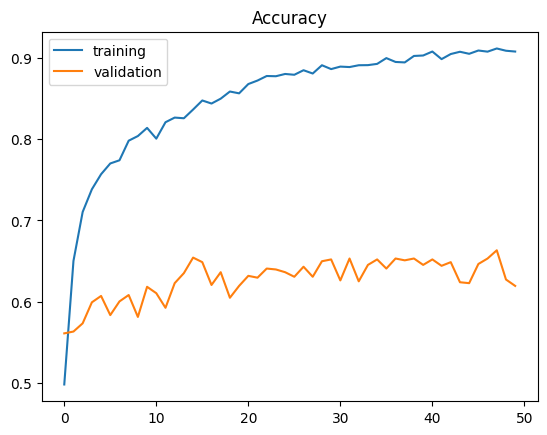

In [11]:
# Accuracy----------
import matplotlib.pyplot as plt

plt.plot(myModel.history['accuracy'])
plt.plot(myModel.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

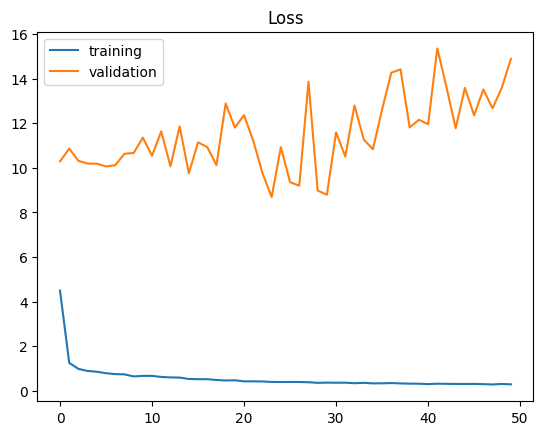

In [12]:
# LOST-------------
plt.plot(myModel.history['loss'])
plt.plot(myModel.history['val_loss'])
plt.legend(['training','validation'])
plt.title("Loss")

### Test

In [14]:
# TEST-----------------------------------------------------
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest Loss:', test_loss)
print('\nTest accuracy:', test_acc)

5/5 - 48s - loss: 17.3907 - accuracy: 0.5937 - 48s/epoch - 10s/step

Test Loss: 17.390724182128906

Test accuracy: 0.5937149524688721
